# Linear Regression for Iris Petal Width Prediction (Loss 2)

In [1]:
# import numpy, tensorflow, and matplotlib.pyplot modules
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# from tensorflow.python.framework import ops

#import Iris dataset
from sklearn import datasets

C:\Users\trevo\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#load Iris dataset
iris = datasets.load_iris()

# Establish feature arrays with sepal lengths and petal widths
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# Establish a tensorflow graph session
sess = tf.Session()

# Define learning rate
learning_rate = 0.05

# Define batch size
batch_size = 25


# Establish tensorflow placeholders for graph session data feeding of
# iris features and classification targets from a single column array
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1],  dtype=tf.float32)

# Define the variable A weight and b bias for the tensorflow graph session 
# to learn and modify

# Initialize weight A with a random value 
A = tf.Variable(tf.random_normal(shape=[1,1]))

# Initialize bias b with a random value 
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [3]:
# Define the graph model operations
my_output = tf.add(tf.matmul(x_data, A), b)

# Define the loss function over each batch
loss = tf.reduce_mean(tf.square(y_target - my_output))

# Initialize variable for graphic session
init = tf.global_variables_initializer()
sess.run(init)

# Define gradient descent optimization algorithm for graphic session
my_opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_opt.minimize(loss)

In [4]:
# loop to graphic training sessions

# Establish list of batch loss values
batch_loss_list = []

# Define number of sessions for training
sess_num = 100
for i in range(0,sess_num):
    # Generate random numbers based on training data and batch size
    rand_index = np.random.choice(len(x_vals), size = batch_size)
    # Select random x feature value (sepal length) and y target value (petal width) for training
    # requires numpy transpose to match placeholder shape
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    # run graphic training sessions with feed placeholder data
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    # run graphic session to compute batch loss values
    temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    batch_loss_list.append(temp_loss)
    # Display algorithm status after each block on 25 iterations
    if ((i+1)%25 == 0):
        print('Step#{} A = {} b = {}'.format((i+1),sess.run(A),sess.run(b)))
        print('Loss = {}'.format(temp_loss))


Step#25 A = [[1.7674534]] b = [[3.3469608]]
Loss = 0.9198700785636902
Step#50 A = [[1.4430689]] b = [[3.969012]]
Loss = 0.30481258034706116
Step#75 A = [[1.206188]] b = [[4.2759647]]
Loss = 0.2784682810306549
Step#100 A = [[1.0864848]] b = [[4.4757547]]
Loss = 0.2316022515296936


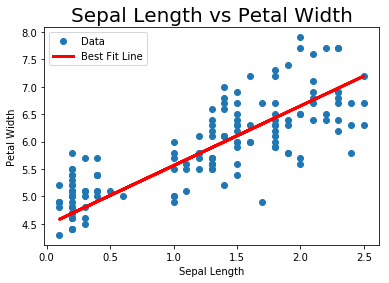

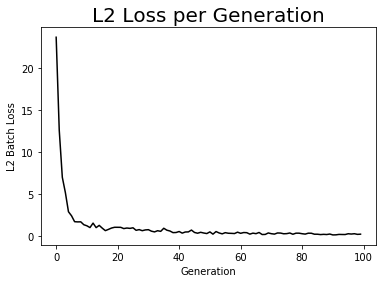

In [5]:
#Visualize of model best fit curve

# Establish list for best fit line value
best_fit_list = []

# Extract model coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Loop to generate best fit line
for i in x_vals:
    best_fit_list.append((slope*i)+y_intercept)

# Plot feature and target data
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit_list, 'r-', label='Best Fit Line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Petal Width', fontsize = 20)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

#Plot L2 batch Losses
plt.plot(batch_loss_list, 'k-')
plt.title('L2 Loss per Generation', fontsize = 20)
plt.xlabel('Generation')
plt.ylabel('L2 Batch Loss')
plt.show()